# T28 Fourier

librosa + numpy

In [1]:
# Part 1
from array2gif import write_gif  # version: 1.0.4
import librosa  # version: 0.8.1
import numpy    # version: 1.19.5
# Part 2
from matplotlib import pyplot as plt
import numpy as np

# Part 1

Convert WAV to GIF

In [2]:
num_freqs = 32
quantize = 2
min_db = -60
max_db = 30
fft_window_size = 2048
frame_step_size = 512
window_function_type = 'hann'
red_pixel = [255, 0, 0]
white_pixel = [255, 255, 255]
dblist = list(range(-60, 31, 2))

In [3]:
y, sample_rate = librosa.load("rfx2.wav")  # sample rate is 22050 Hz

In [4]:
spectrogram = (numpy.around(librosa.power_to_db(librosa.feature.melspectrogram(y, sample_rate, n_mels=num_freqs,
               n_fft=fft_window_size, hop_length=frame_step_size, window=window_function_type)) / quantize) * quantize)

In [5]:
print("Size[0]", np.size(spectrogram, 0))
print("Size[1]", np.size(spectrogram, 1))

Size[0] 32
Size[1] 115


In [6]:
rframe = spectrogram.transpose()

In [7]:
rframe[100]

array([-18., -30., -26.,  -8.,   0.,   6.,   8.,  -4.,  10.,  -8., -30.,
       -24., -18., -42., -20., -16., -20., -36., -20., -22., -44., -36.,
       -40., -36., -38., -52., -52., -52., -52., -52., -52., -52.],
      dtype=float32)

In [8]:
gif_data = [
    numpy.kron(
        numpy.array([
            [
                red_pixel if freq % 2 and round(frame[freq // 2]) > threshold else white_pixel
                for threshold in list(range(min_db, max_db + 1, quantize))[::-1]
            ]
            for freq in range(num_freqs * 2 + 1)]
        ),
        numpy.ones([quantize, quantize, 1])
    )
    for frame in spectrogram.transpose()
]

In [9]:
len(gif_data)

115

In [10]:
print("Size[0]", np.size(gif_data, 0))
print("Size[1]", np.size(gif_data, 1))
print("Size[2]", np.size(gif_data, 2))
print("Size[3]", np.size(gif_data, 3))

Size[0] 115
Size[1] 130
Size[2] 92
Size[3] 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


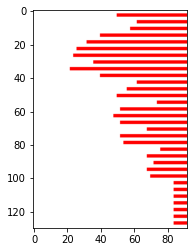

In [11]:
plt.imshow(gif_data[100])

In [12]:
gif_data2 = [
    numpy.array([
        [
            red_pixel if freq % 2 and round(frame[freq // 2]) > threshold else white_pixel
            for threshold in list(range(min_db, max_db + 1, quantize))[::-1]
        ]
        for freq in range(num_freqs * 2 + 1)]
    )
    for frame in spectrogram.transpose()
]

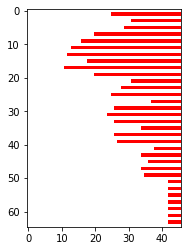

In [13]:
plt.imshow(gif_data2[100])

In [14]:
rdata0 = [
    numpy.array([
        [
            (round(frame[freq // 2]), threshold) if freq % 2 else (0, threshold)
            for threshold in list(range(min_db, max_db + 1, quantize))[::-1]
        ]
        for freq in range(num_freqs * 2 + 1)
    ])
    for frame in spectrogram.transpose()
]

In [15]:
print("Size[0]", np.size(rdata0, 0))
print("Size[1]", np.size(rdata0, 1))
print("Size[2]", np.size(rdata0, 2))
print("Size[3]", np.size(rdata0, 3))

Size[0] 115
Size[1] 65
Size[2] 46
Size[3] 2


In [16]:
rdata0[100][1]

array([[-18,  30],
       [-18,  28],
       [-18,  26],
       [-18,  24],
       [-18,  22],
       [-18,  20],
       [-18,  18],
       [-18,  16],
       [-18,  14],
       [-18,  12],
       [-18,  10],
       [-18,   8],
       [-18,   6],
       [-18,   4],
       [-18,   2],
       [-18,   0],
       [-18,  -2],
       [-18,  -4],
       [-18,  -6],
       [-18,  -8],
       [-18, -10],
       [-18, -12],
       [-18, -14],
       [-18, -16],
       [-18, -18],
       [-18, -20],
       [-18, -22],
       [-18, -24],
       [-18, -26],
       [-18, -28],
       [-18, -30],
       [-18, -32],
       [-18, -34],
       [-18, -36],
       [-18, -38],
       [-18, -40],
       [-18, -42],
       [-18, -44],
       [-18, -46],
       [-18, -48],
       [-18, -50],
       [-18, -52],
       [-18, -54],
       [-18, -56],
       [-18, -58],
       [-18, -60]])

In [17]:
rdata1 = [
    numpy.array([
        [
            1 if freq % 2 and round(frame[freq // 2]) > threshold else 0
            for threshold in list(range(min_db, max_db + 1, quantize))[::-1]
        ]
        for freq in range(num_freqs * 2 + 1)]
    )
    for frame in spectrogram.transpose()
]

In [18]:
print("Size[0]", np.size(rdata1, 0))
print("Size[1]", np.size(rdata1, 1))
print("Size[2]", np.size(rdata1, 2))

Size[0] 115
Size[1] 65
Size[2] 46


In [19]:
rdata1[100][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [20]:
len(rdata1[100][1])

46

In [21]:
t100 = np.sum([0 if np.sum(rdata1[100][1][tdb]) == 0 else 1 for tdb in range(46)])

In [22]:
t100

21

In [23]:
dblist[t100]

-18

In [24]:
r100 = [np.sum([0 if np.sum(rdata1[100][tfq][tdb]) == 0 else 1 for tdb in range(46)]) for tfq in range(1,65,2)]

In [26]:
write_gif(gif_data, 'rfx2.gif', fps=sample_rate/frame_step_size)

## Part 2

Convert GIF to WAV 

In [27]:
from PIL import Image, ImageSequence

img = Image.open('rfx2.gif')
frames = np.array([np.array(frame.copy().convert('RGB').getdata(),dtype=np.uint8).reshape(frame.size[1],frame.size[0],3) for frame in ImageSequence.Iterator(img)])

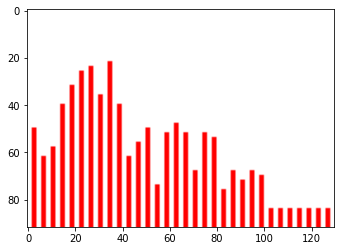

In [28]:
plt.imshow(frames[100])

In [29]:
print("Size[0]", np.size(frames, 0))
print("Size[1]", np.size(frames, 1))
print("Size[2]", np.size(frames, 2))
print("Size[3]", np.size(frames, 3))

Size[0] 115
Size[1] 92
Size[2] 130
Size[3] 3


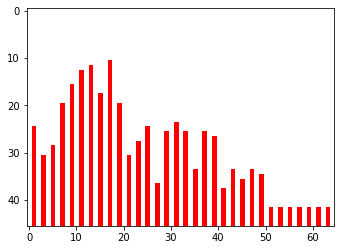

In [30]:
plt.imshow(frames[100][::2,::2,::1])

In [31]:
tframe = frames[100][::2,::2,::1]

In [32]:
len(tframe)

46

In [33]:
dmel = list()
for frame in frames:
    nframe = frame[::2,::2,::1][:,1:64:2,:]
    nflst  = list()
    for nfreq in range(32):
        nfsdb = np.sum([0 if np.sum(nframe[tdb][nfreq]) == 255*3 else 1 for tdb in range(46)])
        nfmdb = dblist[nfsdb]
        nflst.append(nfmdb)
    dmel.append(nflst)

In [34]:
tframe1 = frames[100][::2,::2,::1][:,1:64:2,:]

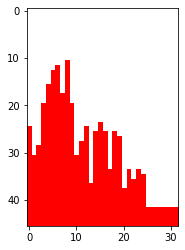

In [35]:
plt.imshow(tframe1)

In [36]:
tframe1[40][0]

array([255,   0,   0], dtype=uint8)

In [37]:
np.sum([0 if np.sum(tframe1[tdb][0]) == 255*3 else 1 for tdb in range(46)])

21

In [38]:
dblist[29]

-2

In [39]:
np.sum([0 if np.sum(tframe1[tdb][3]) == 255*3 else 1 for tdb in range(46)])

26

In [40]:
dblist[43]

26

In [41]:
for nfreq in range(32):
    print("Freq:%d DB:%d" % (nfreq, dblist[np.sum([0 if np.sum(tframe1[tdb][nfreq]) == 255*3 else 1 for tdb in range(46)])]))

Freq:0 DB:-18
Freq:1 DB:-30
Freq:2 DB:-26
Freq:3 DB:-8
Freq:4 DB:0
Freq:5 DB:6
Freq:6 DB:8
Freq:7 DB:-4
Freq:8 DB:10
Freq:9 DB:-8
Freq:10 DB:-30
Freq:11 DB:-24
Freq:12 DB:-18
Freq:13 DB:-42
Freq:14 DB:-20
Freq:15 DB:-16
Freq:16 DB:-20
Freq:17 DB:-36
Freq:18 DB:-20
Freq:19 DB:-22
Freq:20 DB:-44
Freq:21 DB:-36
Freq:22 DB:-40
Freq:23 DB:-36
Freq:24 DB:-38
Freq:25 DB:-52
Freq:26 DB:-52
Freq:27 DB:-52
Freq:28 DB:-52
Freq:29 DB:-52
Freq:30 DB:-52
Freq:31 DB:-52


In [42]:
n100 = [np.sum([1 if np.sum(tframe1[tdb][tfq]) == 255 else 0 for tdb in range(46)]) for tfq in range(32)]

In [43]:
np.subtract(n100, r100)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
bsg = np.array([np.array(dframe).transpose() for dframe in dmel], dtype='float32').transpose()

In [45]:
np.sum(np.subtract(bsg, spectrogram))

0.0

In [46]:
snd = librosa.feature.inverse.mel_to_stft(
    M=librosa.db_to_power(bsg),
    sr=sample_rate
)

In [47]:
import soundfile as sf
sf.write('sfx2.wav', librosa.griffinlim(snd), sample_rate)